In [19]:
psrname='J1730-2304'

In [20]:
spna_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_DM10/ptmcmc/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [21]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
from diff_chain import  Diff_chain_shift

In [22]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
epta_spna_2=epta_spna_1.T

In [23]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
epta_spnta_2=epta_spnta_1.T

In [24]:


spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]

spnta_arr=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

In [25]:
names = ['logA_DM','gamma_DM']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA_DM','delta_gamma_DM']

# Tension considering dm noise only

In [26]:
spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=epta_spna_2[-3],names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=epta_spnta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)


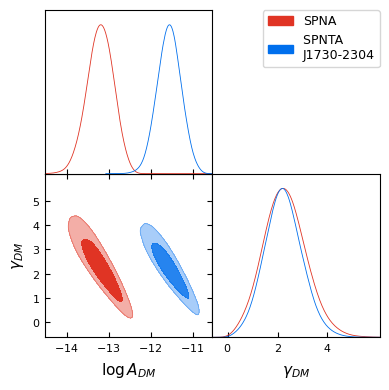

In [27]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA.png',dpi=300)
plt.show()

In [28]:
from diff_chain import  Diff_chain_shift

In [29]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

/media/root1/3PAR/adarsh/diff_chain.py:33: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


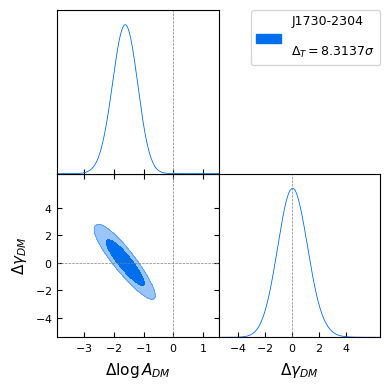

In [30]:


g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNTA.png',dpi=300)

